In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv("water_potability.csv")

In [ ]:
#EDA(Exploring Data and features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
#Feature Engineering((Imputting Missing Values,Outlier,finding imbalance)) and Feature Selection and Feature Scaling
#Model Selection By Cross_Validation
#Model Building 
#Model HyperParameterTuning
#Model Evaluation(Testing)

In [95]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [179]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [96]:
df.shape

(3276, 10)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [150]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [97]:
df.size

32760

In [98]:
df.index

RangeIndex(start=0, stop=3276, step=1)

In [99]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [100]:
df1=df.copy()

In [101]:
df.head(1)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0 NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         86.99097   2.963135           0

In [102]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [103]:
#All DataTypes are Correctly Aligned

In [104]:
df.duplicated().sum()

0

In [105]:
#There is no Duplicate

In [106]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [107]:
df.isnull().sum()*100/len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [108]:
#EDA and FeatureEngineering

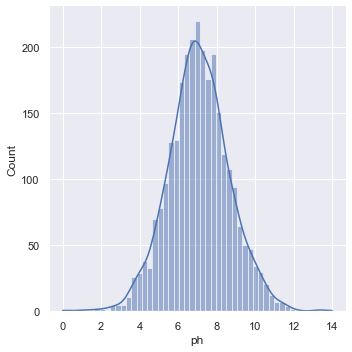

In [109]:
sns.displot(x=df['ph'],kde=True);

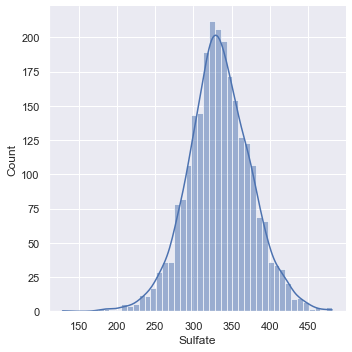

In [110]:
sns.displot(x=df['Sulfate'],kde=True);

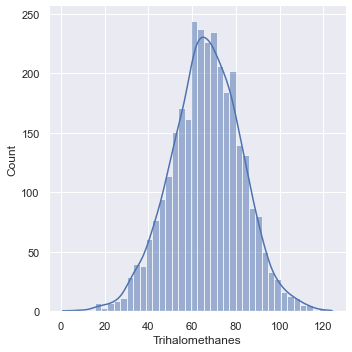

In [111]:
sns.displot(x=df['Trihalomethanes'],kde=True);

In [112]:
#Will Impute Missing Values by Mean because plot is almost noramlly distributed

In [114]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

In [115]:
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)

In [116]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

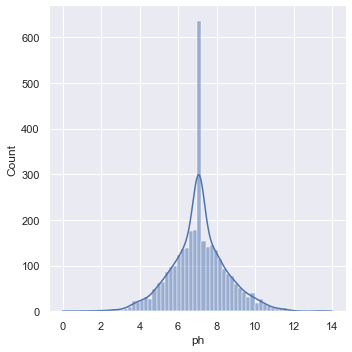

In [117]:
sns.displot(x=df['ph'],kde=True);

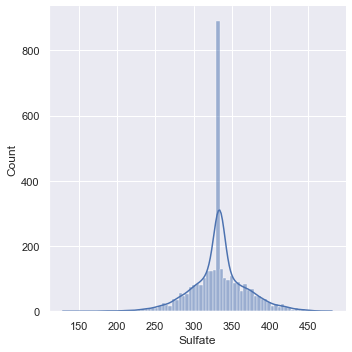

In [118]:
sns.displot(x=df['Sulfate'],kde=True);

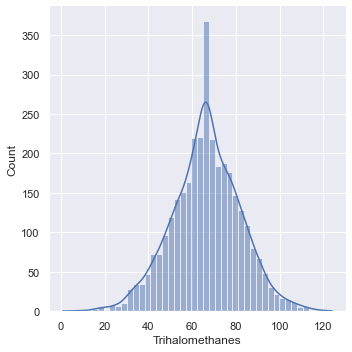

In [119]:
sns.displot(x=df['Trihalomethanes'],kde=True);

In [120]:
df.isnull().sum()*100/len(df)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [121]:
#Now no Null Values

<Figure size 432x288 with 0 Axes>

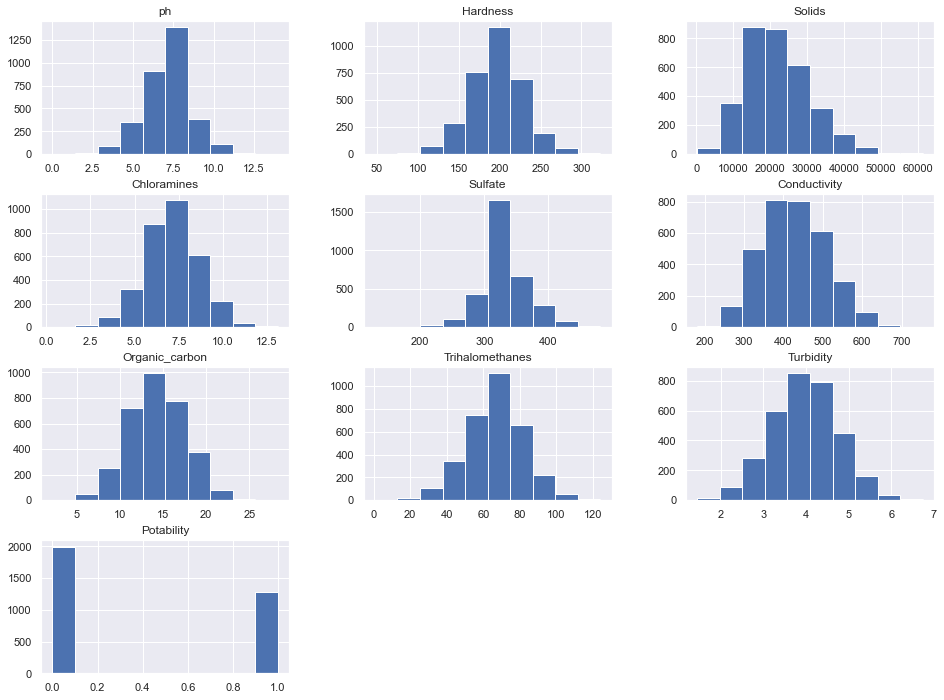

In [122]:
plt.figure()
df.hist(figsize=(16,12));

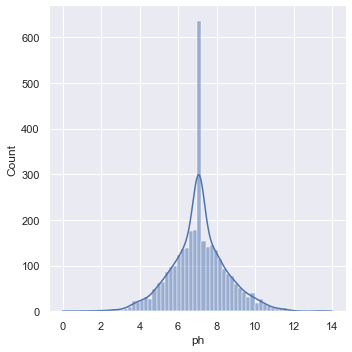

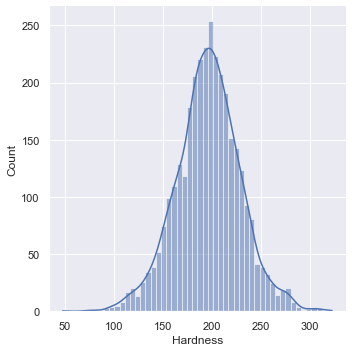

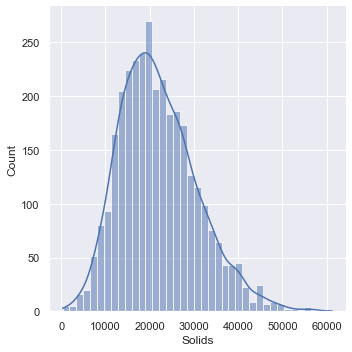

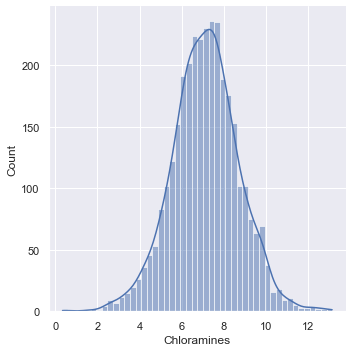

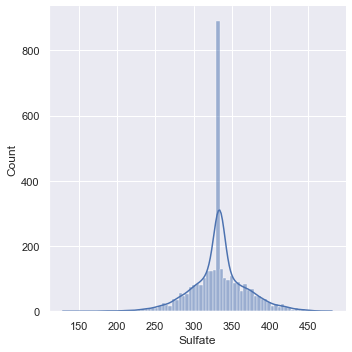

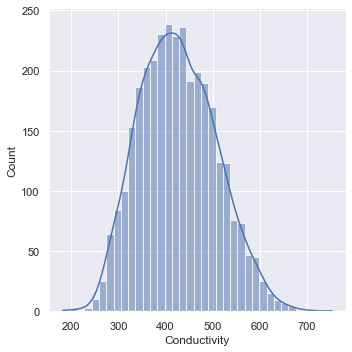

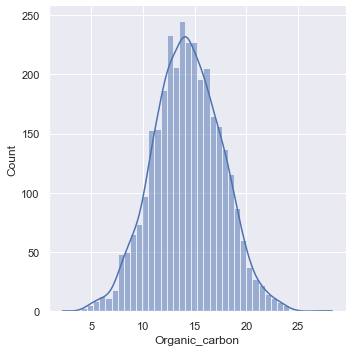

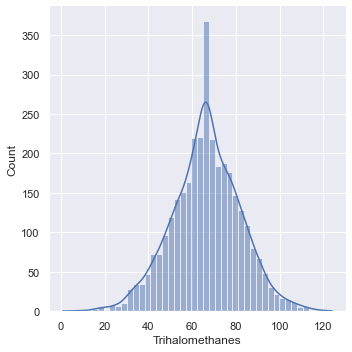

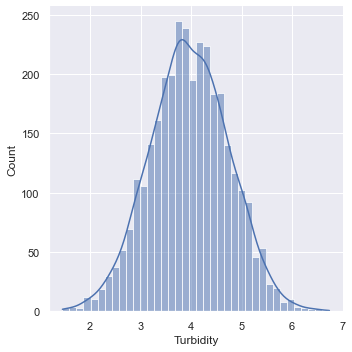

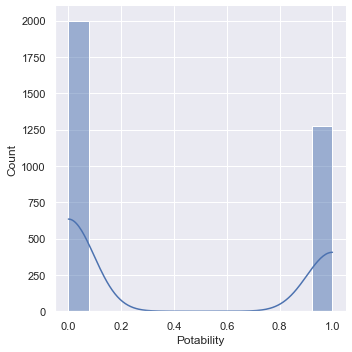

In [123]:
for col in df.columns:
    sns.displot(df[col],kde=True);

In [124]:
df.iloc[0]

ph                     7.080795
Hardness             204.890455
Solids             20791.318981
Chloramines            7.300212
Sulfate              368.516441
Conductivity         564.308654
Organic_carbon        10.379783
Trihalomethanes       86.990970
Turbidity              2.963135
Potability             0.000000
Name: 0, dtype: float64

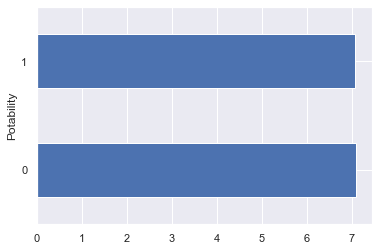

In [125]:
df.groupby('Potability').ph.mean().plot(kind='barh');


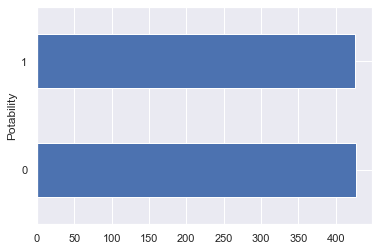

In [126]:
df.groupby('Potability').Conductivity.mean().plot(kind='barh');

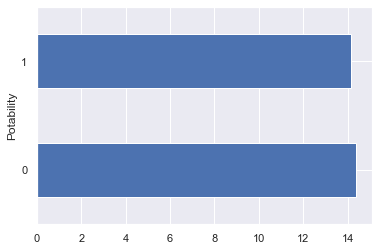

In [127]:
df.groupby('Potability').Organic_carbon.mean().plot(kind='barh');

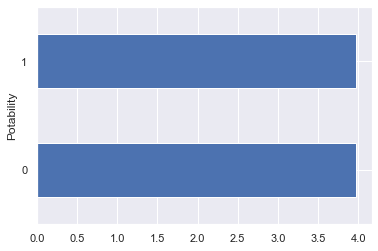

In [128]:
df.groupby('Potability').Turbidity.mean().plot(kind='barh');

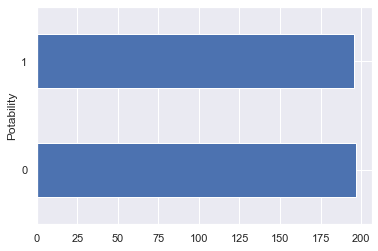

In [129]:
df.groupby('Potability').Hardness.mean().plot(kind='barh');

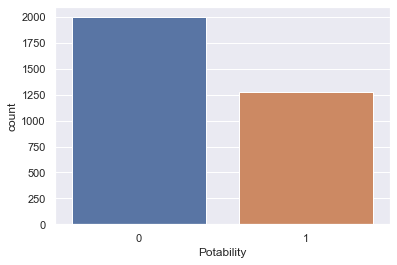

In [130]:
sns.countplot('Potability',data=df);

In [131]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [132]:
#Not That Much Imbalanced

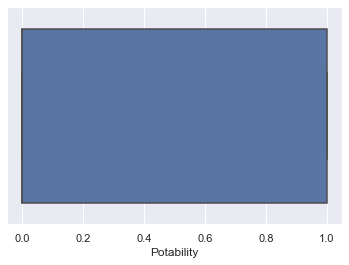

In [133]:
sns.boxplot(x=df['Potability']);

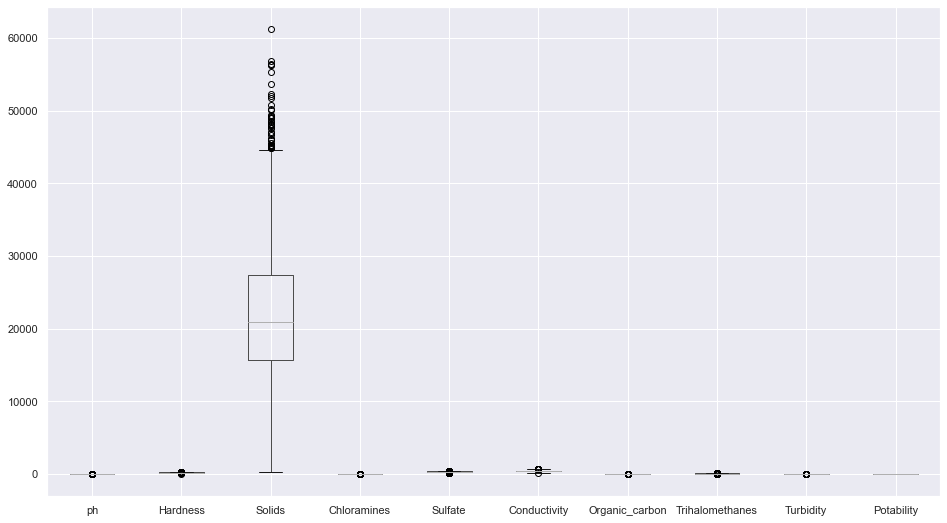

In [156]:
df.boxplot(figsize=(16,9));

In [ ]:
#there is only outlier on Solids but will keep it maybe water is bad due it so if will remove it then not able to predictquality

<Figure size 2160x1440 with 0 Axes>

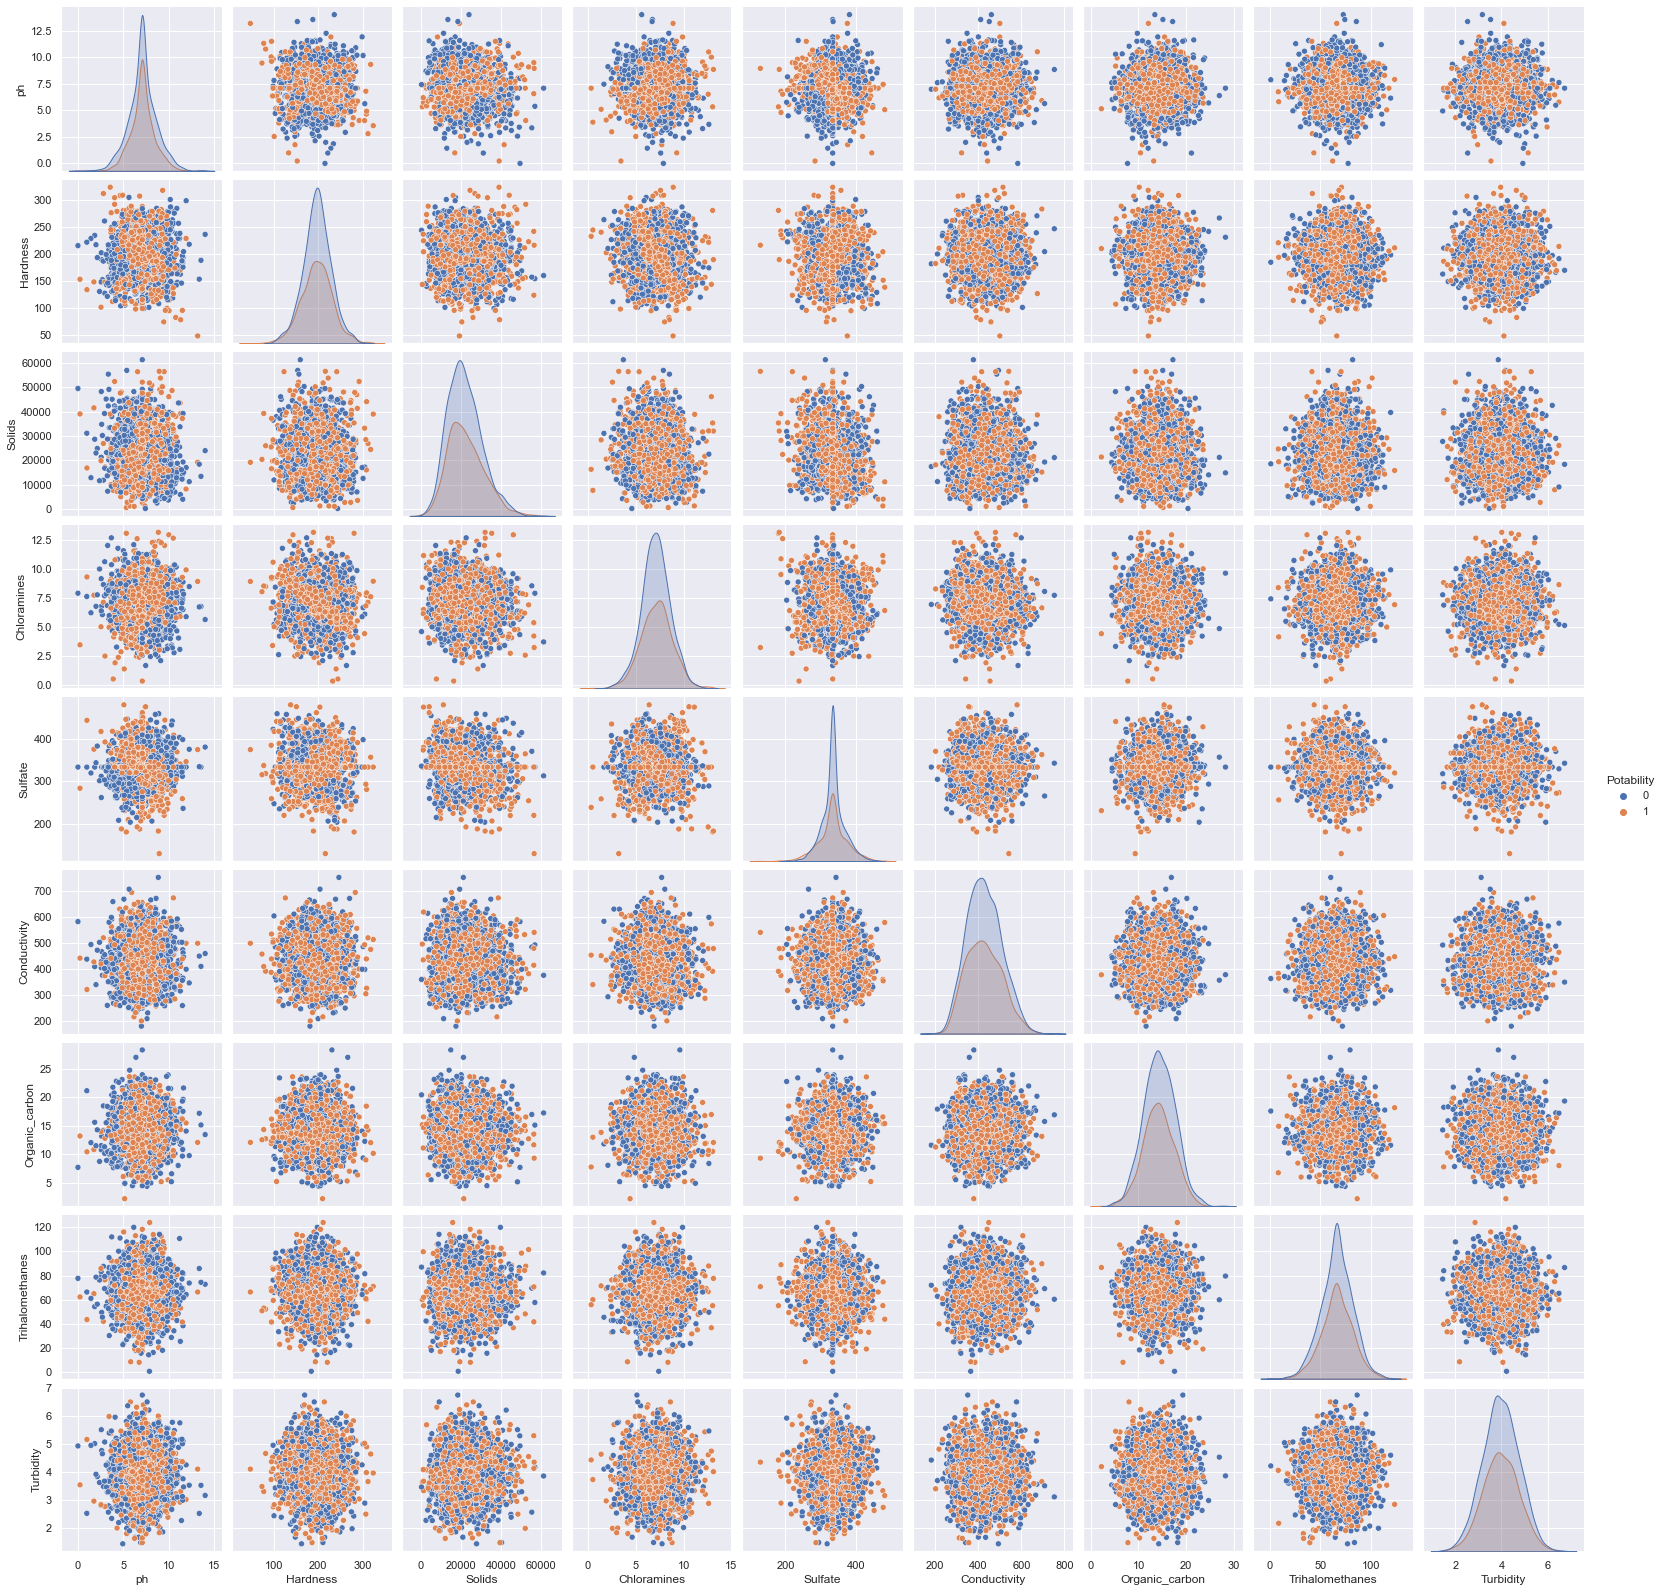

In [147]:
plt.figure(figsize=(30,20));
sns.pairplot(hue='Potability',data=df);

<AxesSubplot:>

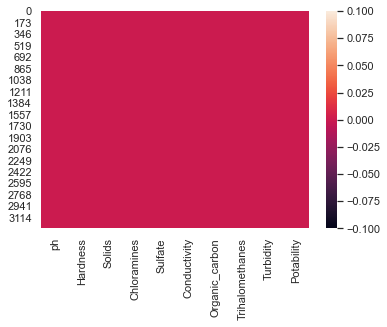

In [136]:
sns.heatmap(df.isnull())

In [182]:
#No Null Values

<AxesSubplot:xlabel='Potability', ylabel='ph'>

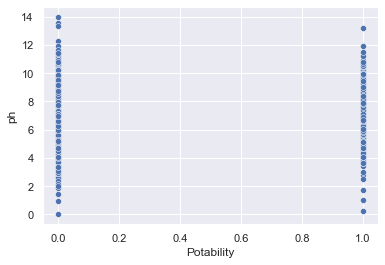

In [137]:
sns.scatterplot(x='Potability',y='ph',data=df)

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

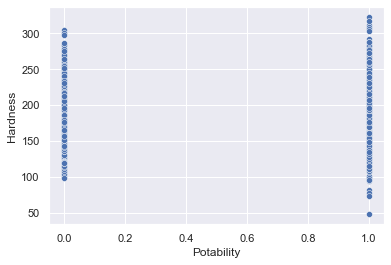

In [138]:
sns.scatterplot(x='Potability',y='Hardness',data=df)

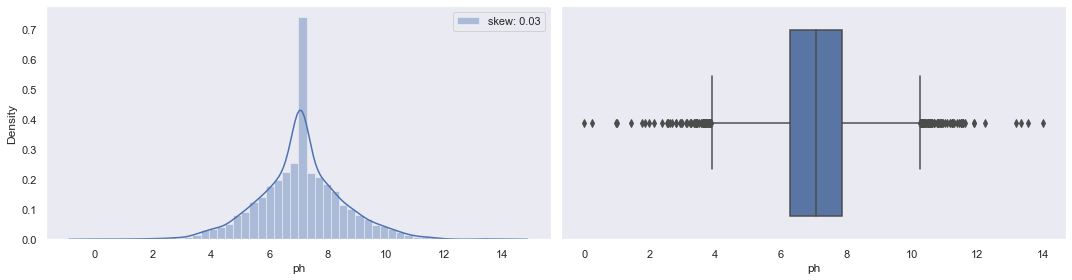

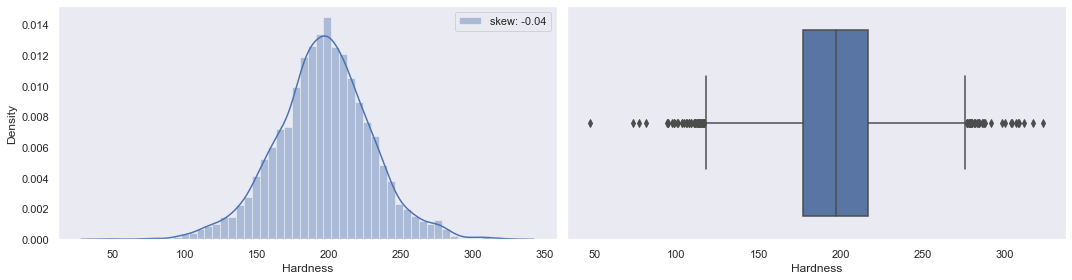

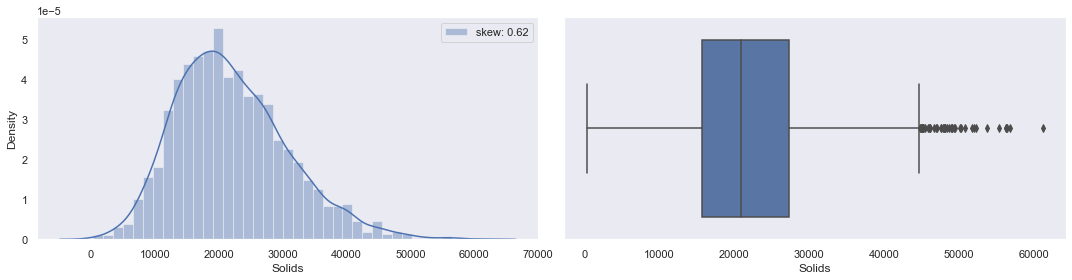

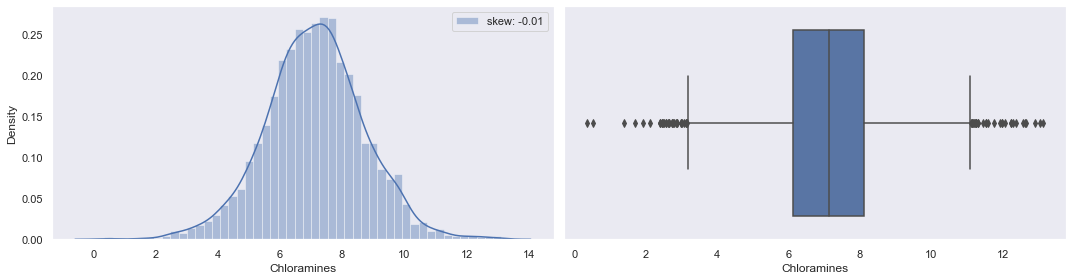

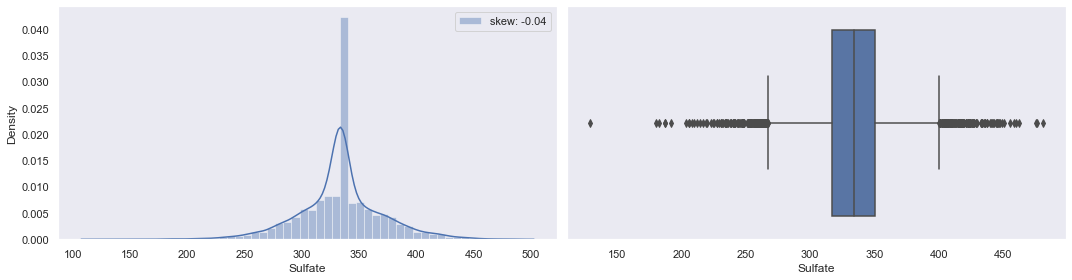

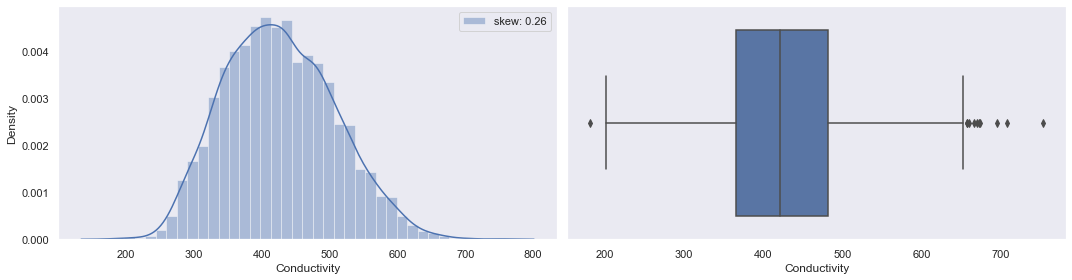

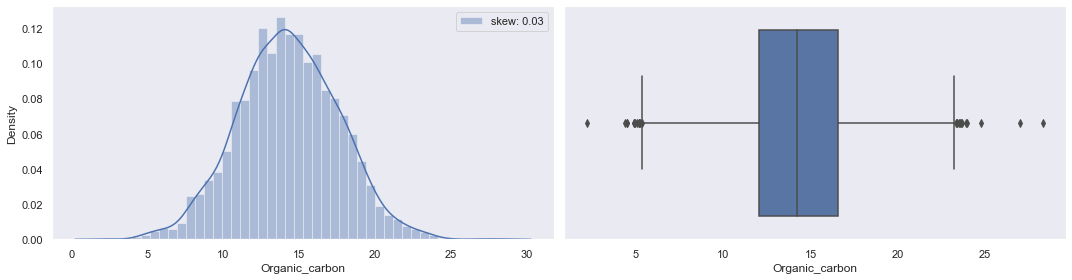

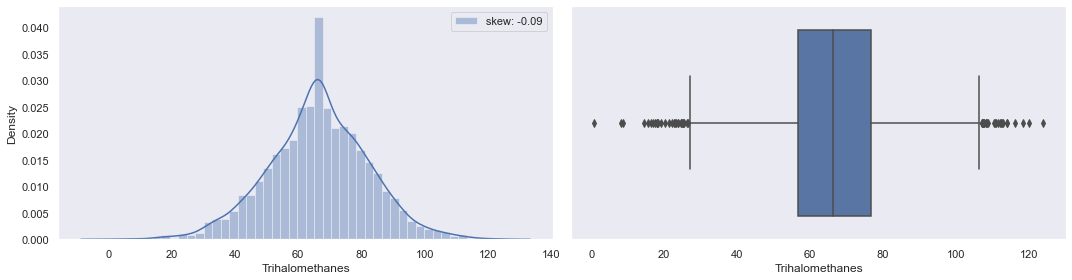

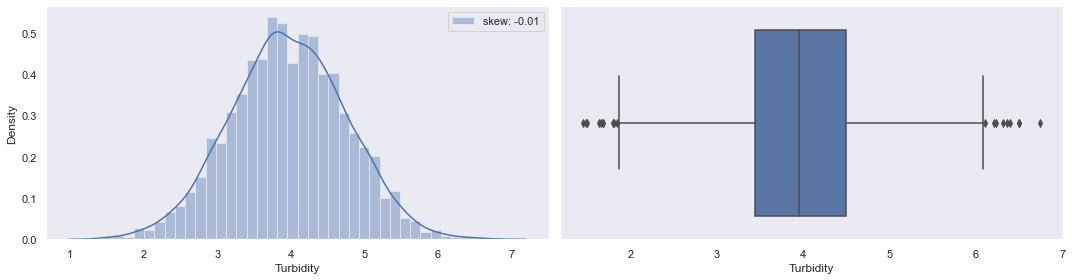

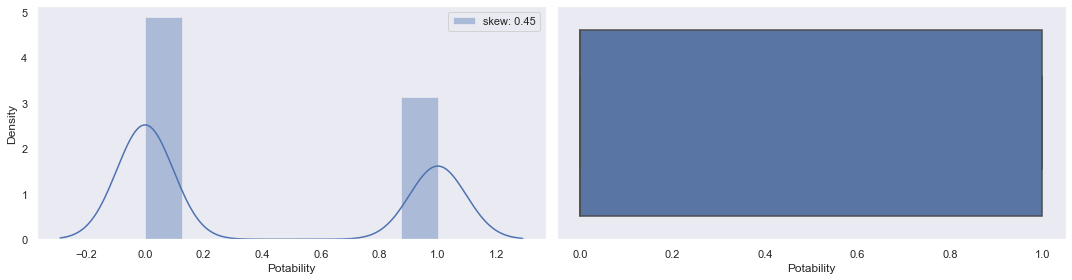

In [181]:
sns.set_style('dark')
for col in df.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [ ]:
#Feature Selection

In [143]:
df.corr()['Potability']

ph                -0.003287
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.020619
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.006960
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64

<AxesSubplot:>

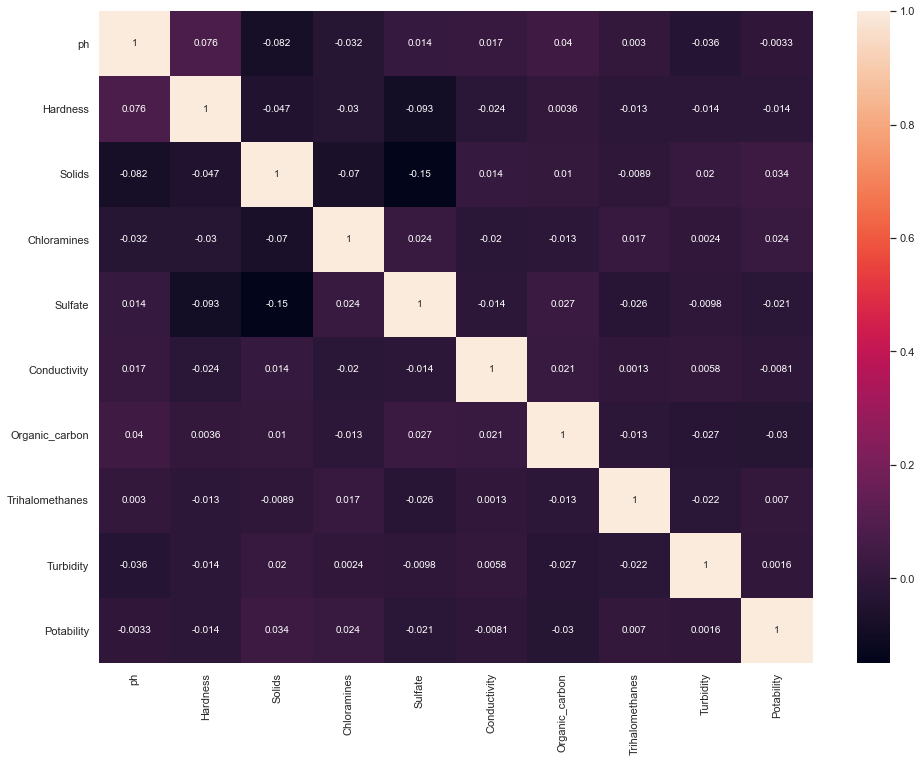

In [146]:
plt.figure(figsize=(16,12));
sns.heatmap(df.corr(),annot=True)

In [ ]:
#There is no MultiCollineraity

In [151]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [153]:
df[df['Potability']==0]

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3112  6.616731  195.096968  34277.760400     7.632639  333.775777   
3113  7.734569  230.919506  21776.594455     6.908591  333.775777   
3114  6.971577  185.906938  27959.987873     7.214510  349.743879   
3115  4.709187  179.141018  22291.418577     6.774276  407.417977   
3116  5.230003  176.714023  27971.891806     7.597981  413.914001   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3112    417.465080       13.432557        47.945936   3.622379           0  
3113    395.114961       15.033557        92.697369   3.821456           0  
3114    414.067354       19.882917        36.179003   3.226349           0  
3115    371.264843       18.186801        86.528627   3.860084           0  
3116    440.355374       14.423614        72.837370   3.045612           0  

[1998 rows x 10 columns]

In [157]:
df[df['Potability']==1]

ph    Hardness        Solids  Chloramines     Sulfate  \
250   9.445130  145.805402  13168.529156     9.444471  310.583374   
251   9.024845  128.096691  19859.676476     8.016423  300.150377   
252   7.080795  169.974849  23403.637304     8.519730  333.775777   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
254   7.174135  203.408935  20401.102461     7.681806  287.085679   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
250     592.659021        8.606397        77.577460   3.875165           1  
251     451.143481       14.770863        73.778026   3.985251           1  
252     475.573562       12.924107        50.861913   2.747313           1  
253     376.456593       11.432466        73.777275   3.854940           1  
254     315.549900       14.533510        74.405616   3.939896           1  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[1278 rows x 10 columns]

In [ ]:
#0 maens not Drinkable
#1 means Drinkable

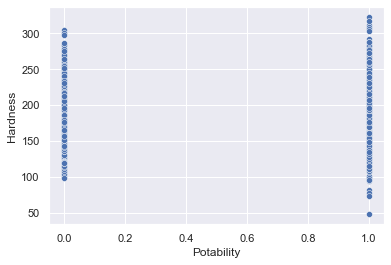

In [170]:
sns.scatterplot(x=df['Potability'],y=df['Hardness']);

In [ ]:
#Means if hardness Values goes more than 300 and less than 100 then water is not drinkable

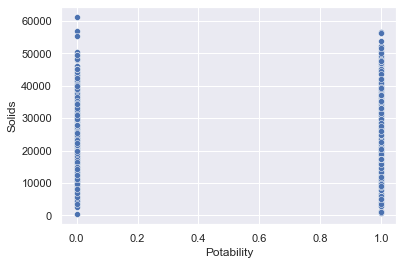

In [171]:
sns.scatterplot(x=df['Potability'],y=df['Solids']);

In [ ]:
#Means if Solids Values goes more than 55000  then water is not drinkable

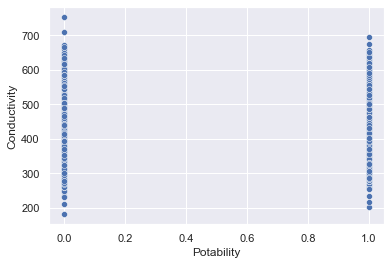

In [172]:
sns.scatterplot(x=df['Potability'],y=df['Conductivity']);

In [ ]:
#Means if Conductivity Values goes more than 700 and less than 200 then water is not drinkable

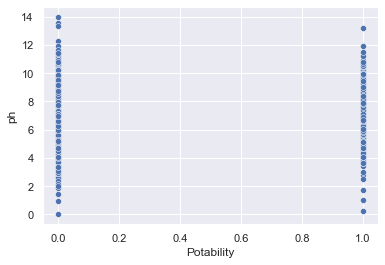

In [173]:
sns.scatterplot(x=df['Potability'],y=df['ph']);

In [ ]:
#Means if ph Values goes more than 13 then water is not drinkable

In [174]:
#Partitioning

In [175]:
X=df.drop(columns='Potability',axis=True)

In [176]:
y=df['Potability']

In [177]:
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [178]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [187]:
scale=StandardScaler()

In [189]:
X_tran_fom=scale.fit_transform(X)

In [194]:
lrc=LogisticRegression()

In [195]:
lrcv=cross_val_score(lrc,X,y,cv=10,n_jobs=-1)

In [196]:
lrcv

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6116208 , 0.6116208 , 0.60856269, 0.60856269])

In [197]:
lrcv.mean()

0.6098903557842918

In [ ]:
#Transformed Data

In [198]:
lrc=LogisticRegression()

In [199]:
lrcv=cross_val_score(lrc,X_tran_fom,y,cv=10,n_jobs=-1)

In [200]:
lrcv

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6146789 , 0.6116208 , 0.60856269, 0.60856269])

In [201]:
lrcv.mean()

0.6101961661818454

In [202]:
sv=SVC()

In [203]:
svv=cross_val_score(sv,X,y,cv=10,n_jobs=-1)

In [204]:
svv

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6116208 , 0.6116208 , 0.60856269, 0.60856269])

In [205]:
svv.mean()

0.6098903557842918

In [206]:
#Transformed Data

In [207]:
sv=SVC()

In [208]:
svv=cross_val_score(sv,X_tran_fom,y,cv=10,n_jobs=-1)

In [209]:
svv

array([0.65853659, 0.61585366, 0.68292683, 0.67987805, 0.67987805,
       0.59756098, 0.62385321, 0.63914373, 0.64831804, 0.6911315 ])

In [210]:
svv.mean()

0.6517080629521892

In [211]:
kn=KNeighborsClassifier()

In [212]:
knv=cross_val_score(kn,X,y,cv=10,n_jobs=-1)

In [213]:
knv

array([0.58536585, 0.57621951, 0.57012195, 0.54573171, 0.55792683,
       0.56402439, 0.59021407, 0.57186544, 0.53211009, 0.54740061])

In [214]:
knv.mean()

0.5640980457969718

In [215]:
#Transformed Data

In [216]:
kn=KNeighborsClassifier()

In [217]:
knv=cross_val_score(kn,X_tran_fom,y,cv=10,n_jobs=-1)

In [218]:
knv

array([0.60365854, 0.61890244, 0.6097561 , 0.61890244, 0.61890244,
       0.60670732, 0.55657492, 0.56269113, 0.62079511, 0.59938838])

In [219]:
knv.mean()

0.6016278809577086

In [220]:
dt=DecisionTreeClassifier()

In [224]:
dtv=cross_val_score(dt,X,y,cv=10,n_jobs=-1)

In [225]:
dtv

array([0.55182927, 0.53658537, 0.61280488, 0.53963415, 0.56097561,
       0.55182927, 0.55657492, 0.57798165, 0.60550459, 0.52599388])

In [226]:
dtv.mean()

0.5619713582456926

In [229]:
rf=RandomForestClassifier()

In [230]:
rfv=cross_val_score(rf,X,y,cv=10,n_jobs=-1)

In [231]:
rfv

array([0.64329268, 0.64329268, 0.66463415, 0.65853659, 0.68597561,
       0.57926829, 0.58715596, 0.65443425, 0.66360856, 0.68501529])

In [232]:
rfv.mean()

0.6465214067278288

In [239]:
df.iloc[0]

ph                     7.080795
Hardness             204.890455
Solids             20791.318981
Chloramines            7.300212
Sulfate              368.516441
Conductivity         564.308654
Organic_carbon        10.379783
Trihalomethanes       86.990970
Turbidity              2.963135
Potability             0.000000
Name: 0, dtype: float64

In [240]:
features=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

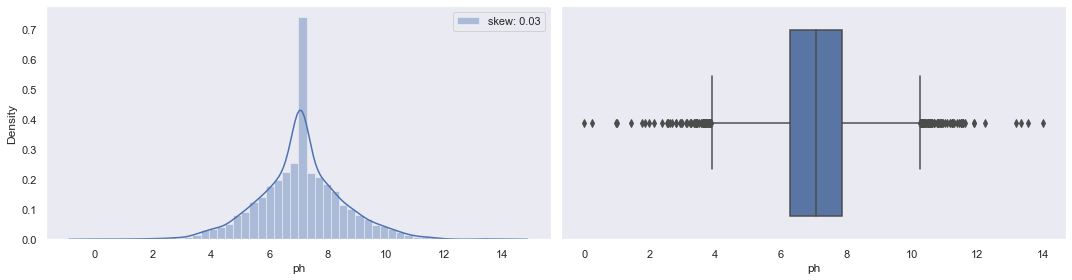

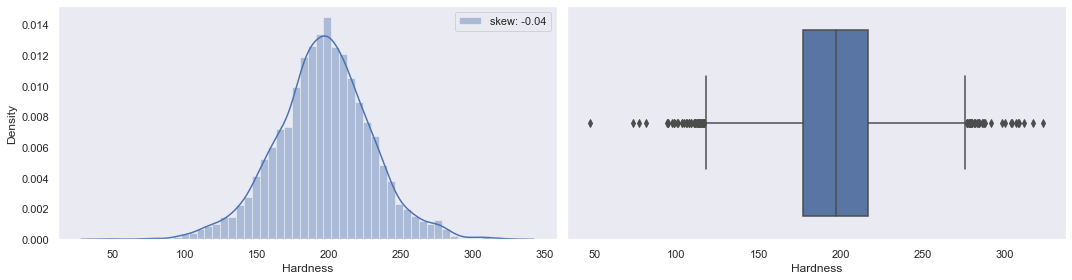

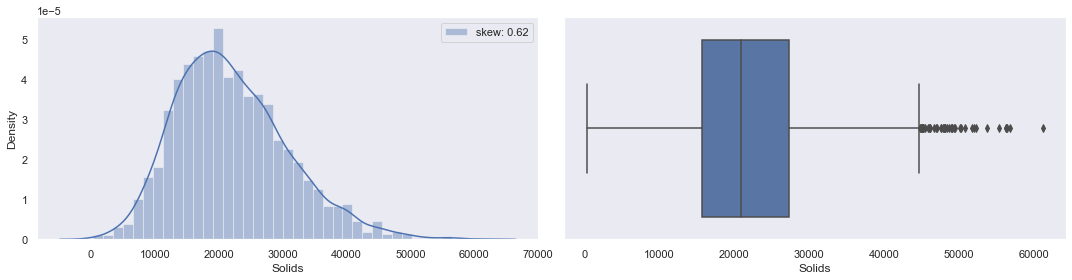

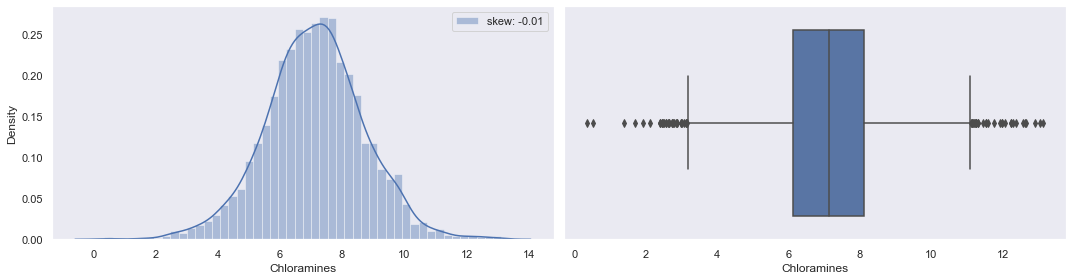

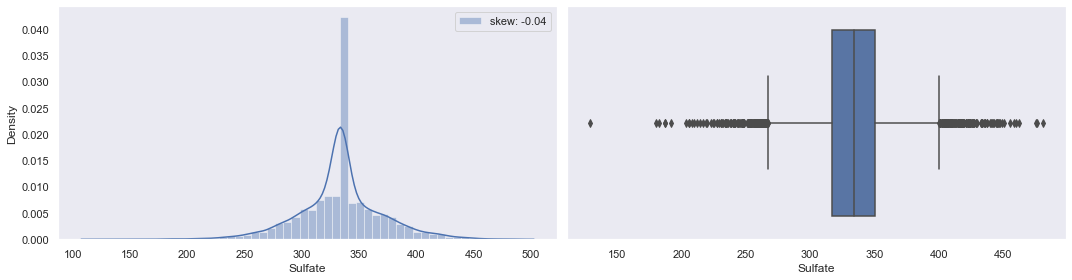

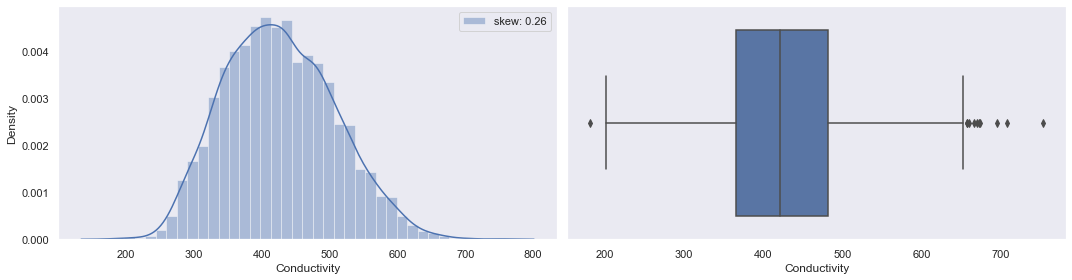

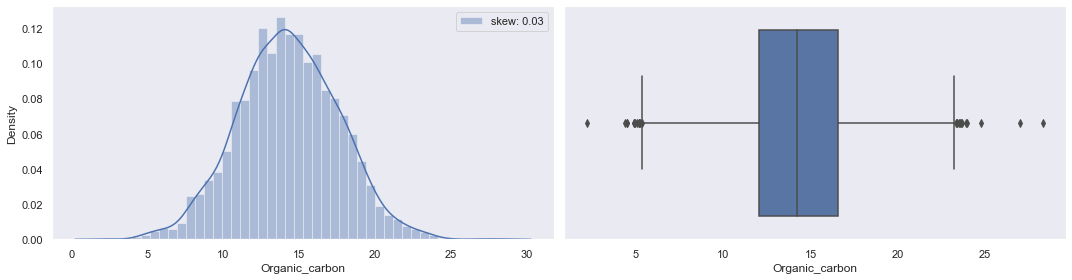

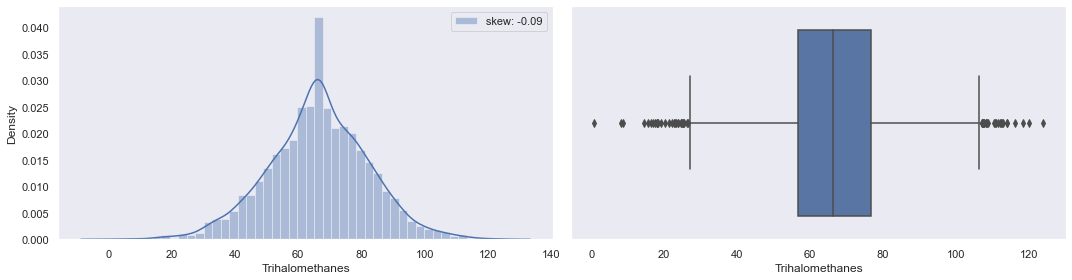

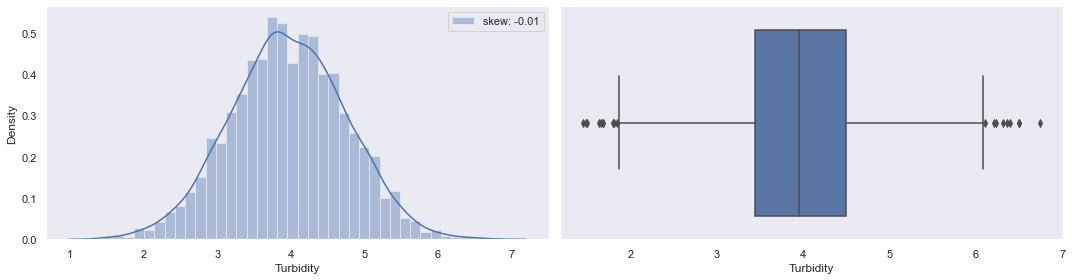

In [241]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [242]:
df_cap=df.copy()

In [243]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [244]:
iqr_capping(df_cap,features, 1.5)

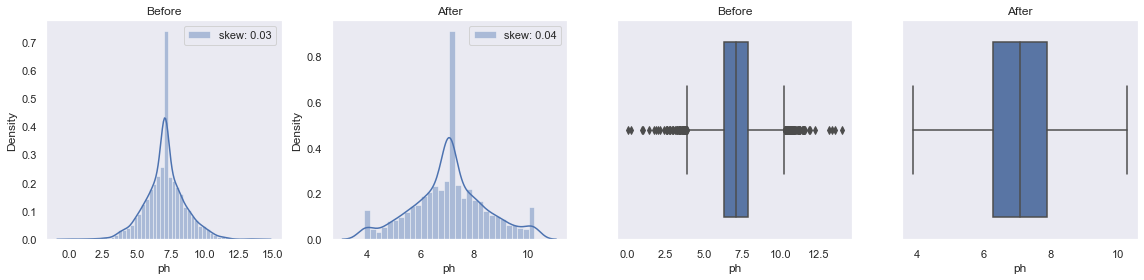

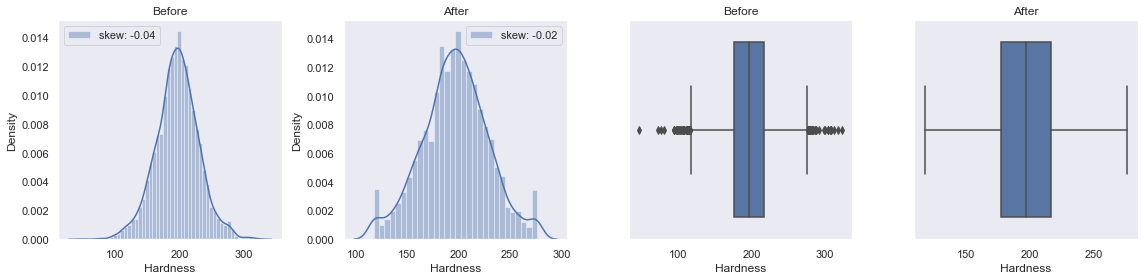

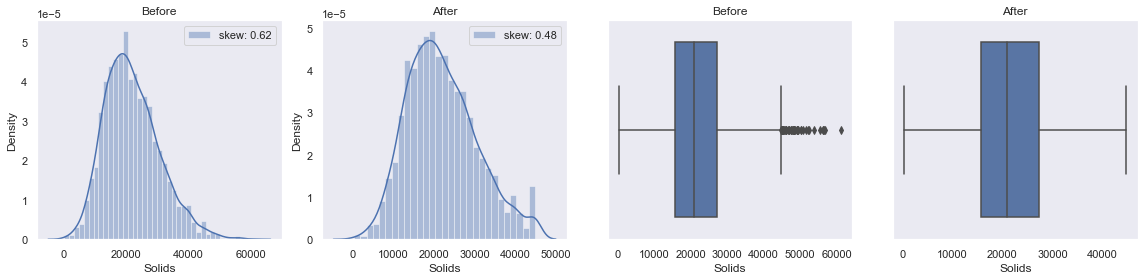

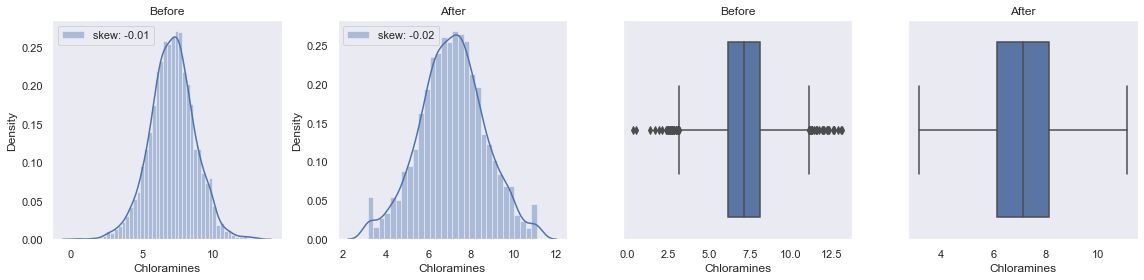

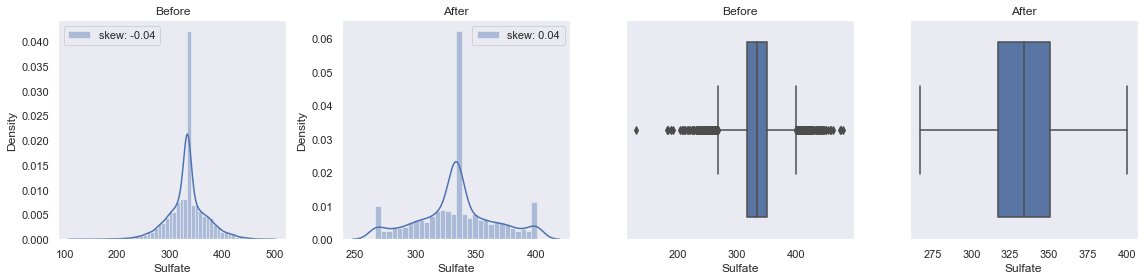

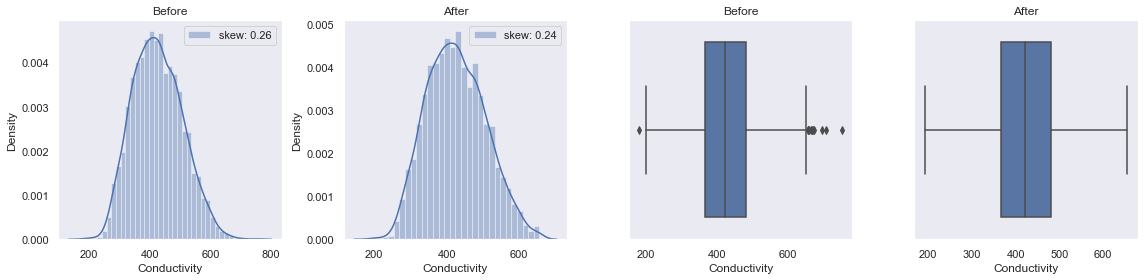

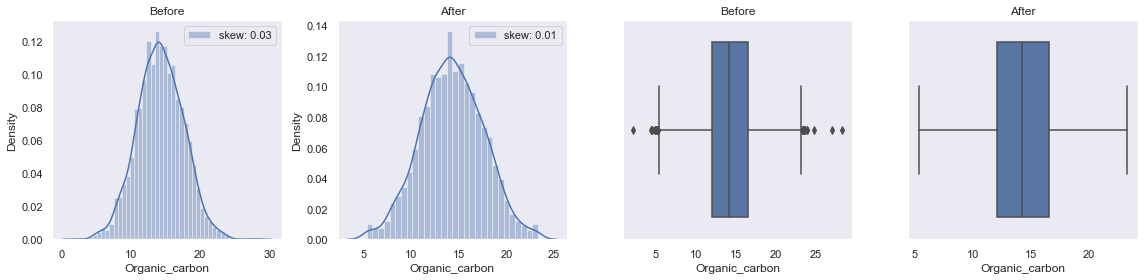

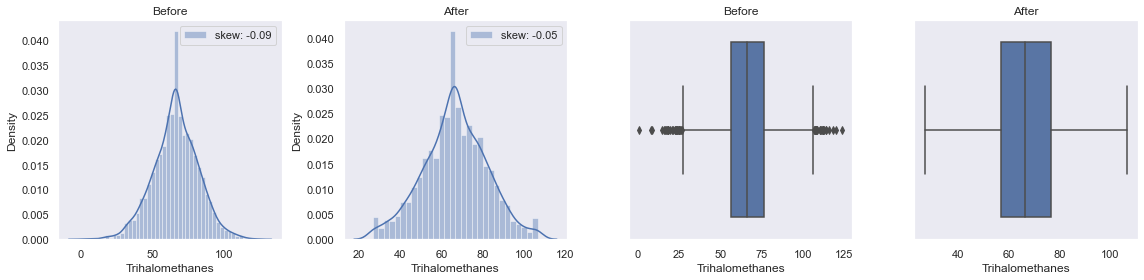

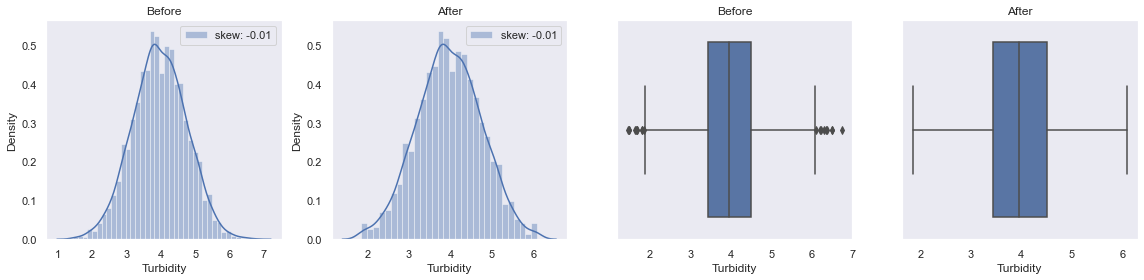

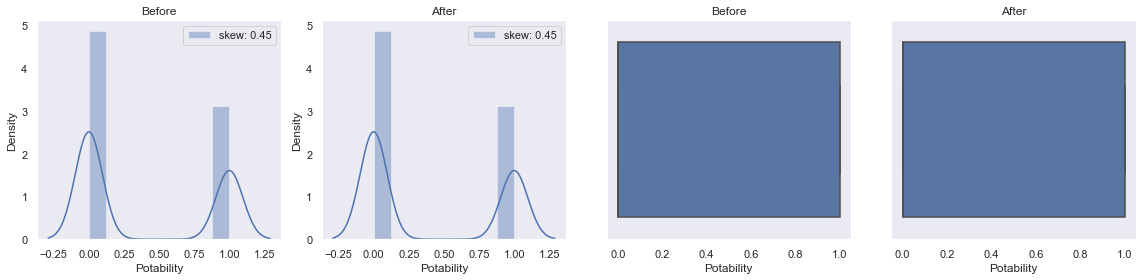

In [245]:
for col in df.columns:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [246]:
df_cap.head(1)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         86.99097   2.963135           0

In [247]:
X=df_cap.drop(columns='Potability',axis='columns')

In [248]:
y=df_cap['Potability']

In [250]:
rfc=RandomForestClassifier()

In [251]:
rfcv=cross_val_score(rfc,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [252]:
rfcv

array([0.64939024, 0.60365854, 0.64329268, 0.66158537, 0.63719512,
       0.56402439, 0.55963303, 0.62996942, 0.66055046, 0.6941896 ])